In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import transforms, utils
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageChops
import torchvision.transforms as transforms
from google.colab import files
import numpy as np

import matplotlib.pyplot as plt
from IPython import display
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torchvision.models as models
from torch.optim import lr_scheduler
import time
import os
import copy
import torchvision
!pip install --quiet lightning-bolts
!pip install --quiet git+https://github.com/greentfrapp/lucent.git
from lucent.optvis import render, param, transform, objectives
from pl_bolts.models.self_supervised import SimCLR # per carregar el model auto-supervisat (SimCLR)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
from torchsummary import summary
import numpy as np
from skimage.feature import local_binary_pattern
from PIL import Image

     |████████████████████████████████| 316 kB 18.6 MB/s 
     |████████████████████████████████| 584 kB 39.0 MB/s 
     |████████████████████████████████| 418 kB 18.0 MB/s 
     |████████████████████████████████| 140 kB 57.5 MB/s 
     |████████████████████████████████| 596 kB 64.8 MB/s 
     |████████████████████████████████| 1.1 MB 58.4 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 271 kB 70.9 MB/s 
     |████████████████████████████████| 144 kB 72.7 MB/s 
     |████████████████████████████████| 225 kB 36.6 MB/s 
     |████████████████████████████████| 297 kB 49.8 MB/s 
     |████████████████████████████████| 297 kB 65.8 MB/s 
     |████████████████████████████████| 297 kB 73.2 MB/s 
     |████████████████████████████████| 296 kB 60.7 MB/s 
     |████████████████████████████████| 296 kB 54.7 MB/s 
     |████████████████████████████████| 280 kB 45.2 MB/s 
     |████████████████████████████████| 280 kB 53.7 MB/s 
     |██████████

In [2]:
resnet50 = torchvision.models.resnet50(pretrained = True, progress = True)
weight_path = 'https://pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imagenet/simclr_imagenet.ckpt'
resnet50_ss = SimCLR.load_from_checkpoint(weight_path, strict=False)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet50.to(device).eval()
resnet50_ss.to(device).eval()
summary(resnet50, (3, 224, 224))
summary(resnet50_ss, (3, 224, 224))

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Downloading: "https://pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imagenet/simclr_imagenet.ckpt" to /root/.cache/torch/hub/checkpoints/simclr_imagenet.ckpt


  0%|          | 0.00/229M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/saving.py:218: UserWarning: Found keys that are not in the model state dict but in the checkpoint: ['non_linear_evaluator.block_forward.2.weight', 'non_linear_evaluator.block_forward.2.bias']
  f"Found keys that are not in the model state dict but in the checkpoint: {keys.unexpected_keys}"


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

# Aplicar diversity term

100%|██████████| 512/512 [12:03<00:00,  1.41s/it]



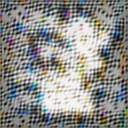
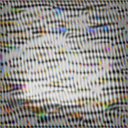
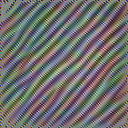
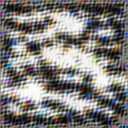

100%|██████████| 512/512 [02:55<00:00,  2.92it/s]



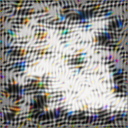

In [3]:
batch_param_f = lambda: param.image(128, batch=4)

obj = objectives.channel("encoder_layer2_1_bn3", 50) - 1 * objectives.diversity("encoder_layer2_1_bn3")

matriu2 = render.render_vis(resnet50_ss, obj, batch_param_f, show_inline=True)
batch_param_f = lambda: param.image(128)

obj = objectives.channel("encoder_layer2_1_bn3", 50)

matriu2 = render.render_vis(resnet50_ss, obj, batch_param_f, show_inline=True)

100%|██████████| 512/512 [28:44<00:00,  3.37s/it]



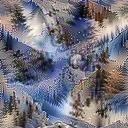
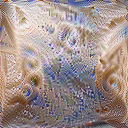
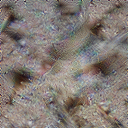
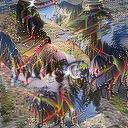

100%|██████████| 512/512 [05:05<00:00,  1.68it/s]



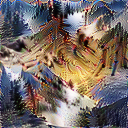

In [4]:
batch_param_f = lambda: param.image(128, batch=4)

obj = objectives.channel("avgpool", 200) - 1e1 * objectives.diversity("avgpool")

matriu2 = render.render_vis(resnet50, obj, batch_param_f, show_inline=True)

batch_param_f = lambda: param.image(128)

obj = objectives.channel("avgpool", 200)
matriu2 = render.render_vis(resnet50, obj, batch_param_f, show_inline=True)